Testing the icestream

In [6]:
%load_ext autoreload
%autoreload 2
%aimport -fenics
%aimport -numpy 
%aimport -matplotlib
from fenics import *
import settings
import solution_io
import numpy as np
import matplotlib.pyplot as plt
import crosssection


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#run experiments
experiments = settings.experiments
for experiment in experiments:
    print(experiment['name'])
    crosssection.run_experiment(experiment)

control

Running 2d experiment:  control
{}
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
           Consider using the option 'quadrature_degree' to reduce the number of points
Solving nonlinear variational problem.
saving to  ../output//2d_control.h5
  Newton solver finished in 7 iterations and 7 linear solver iterations.
wider_icestream

Running 2d experiment:  wider_icestream
{'icestream_width': 50100, 'name': 'wider_icestream'}
Solving linear variational problem.
Solving nonlinear variational problem.
saving to   Newton solver finished in 7 iterations and 7 linear solver iterations.
 ../output//2d_wider_icestream.h5
softer_margin_1

Running 2d experiment:  softer_margin_1
{'name': 'softer_margin_1', 'shearmargin_enhancement': 10}
Solving linear variational problem.
Solving nonlinear variational p

[autoreload of settings failed: Traceback (most recent call last):
  File "/home/ag/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/ag/miniconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/ag/miniconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/ag/boxyicestream/code/settings.py", line 52, in <module>
    experiments += [settings.experiment()]
NameError: name 'settings' is not defined
]


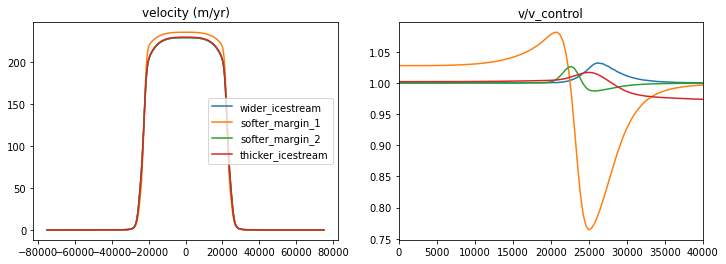

In [8]:

yr2sec = 365.25*24*60*60




w = experiments[0]['domain_w']
x= np.linspace(-w/2,w/2,400)
#x= np.linspace(8e3,12e3,100)

def loadex(experiment):
    fname = settings.filename2d(experiment)
    results = solution_io.load_solution(fname)
    #mesh = results['mesh']
    usol = results['u']
    vfun = usol.sub(2)
    #psol = results['p']
    experiment = results['experiment']
    domain_h = experiment["domain_h"]
    v = np.empty(x.shape)
    for ix in range(len(x)):
        v[ix] = vfun(np.abs(x[ix]),domain_h)
    return v

ref_experiment = experiments[0];
v0 = loadex(ref_experiment)


plt.rcParams['figure.figsize']=(12,4)
f,ax = plt.subplot_mosaic('AB')
for experiment in experiments:
    #if experiment["shearmargin_enhancement"]!=ref_experiment["shearmargin_enhancement"]:
    #    continue
    if experiment["name"]==ref_experiment["name"]:
        continue
    v = loadex(experiment)
    ax['A'].plot(x,v*yr2sec,label=experiment['name'])
    ax['B'].plot(x,v/v0,label=experiment['name'])
    plt.xlim([00e3, 40e3])


ax['A'].legend()
ax['A'].set_title('velocity (m/yr)')
ax['B'].set_title(f'v/v_{ref_experiment["name"]}');

Object cannot be plotted directly, projecting to piecewise linears.


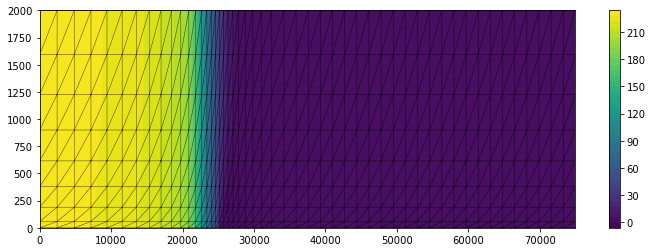

In [9]:
fname = settings.filename2d(experiments[0])
results = solution_io.load_solution(fname)
#mesh = results['mesh']
usol = results['u']
vfun = usol.sub(2)*yr2sec
h=plot(vfun)
plt.colorbar(h)
plot(results['mesh'],linewidth=0.5,color='k',alpha=0.7)
plt.axis('auto');


In [10]:
print(str(results["u"].function_space()))
print("---")
print(str(results["p"].function_space()))


FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 1379), VectorElement(FiniteElement('Lagrange', triangle, 2), dim=3))
---
FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 1379), FiniteElement('Lagrange', triangle, 1))
